Problem Statement
Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

0 represents no heart disease present
1 represents heart disease present

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier.
The remaining 13 features are described in the section below.

slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

resting_blood_pressure (type: int): resting blood pressure

chest_pain_type (type: int): chest pain type (4 values)

num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

sex (type: binary): 0: female, 1: male

age (type: int): age in years

max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
X=pd.read_csv("train_values.csv")
y=pd.read_csv("train_labels.csv")
test=pd.read_csv("test_values.csv")

In [3]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [4]:
test.shape

(90, 14)

In [5]:
X.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
X.shape

(180, 14)

In [7]:
col_X=['id','electrocardiography','thalliumST','RBloodP','Chestpain','num_major_vessels','fasting_blood_sugar',
     'resting_electrocardiac_values','Serum_cholestrol','abnormality_electrocar','sex','age','max_heart_rate','exercise_induced_chestpain']
col_y=['id','heart_disease']

In [8]:
#modifying column names
X.columns=col_X
y.columns=col_y
test.columns=col_X

In [9]:
X.head()

,id,electrocardiography,thalliumST,RBloodP,Chestpain,num_major_vessels,fasting_blood_sugar,resting_electrocardiac_values,Serum_cholestrol,abnormality_electrocar,sex,age,max_heart_rate,exercise_induced_chestpain
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [10]:
test.head()

,id,electrocardiography,thalliumST,RBloodP,Chestpain,num_major_vessels,fasting_blood_sugar,resting_electrocardiac_values,Serum_cholestrol,abnormality_electrocar,sex,age,max_heart_rate,exercise_induced_chestpain
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
id                               180 non-null object
electrocardiography              180 non-null int64
thalliumST                       180 non-null object
RBloodP                          180 non-null int64
Chestpain                        180 non-null int64
num_major_vessels                180 non-null int64
fasting_blood_sugar              180 non-null int64
resting_electrocardiac_values    180 non-null int64
Serum_cholestrol                 180 non-null int64
abnormality_electrocar           180 non-null float64
sex                              180 non-null int64
age                              180 non-null int64
max_heart_rate                   180 non-null int64
exercise_induced_chestpain       180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [12]:
y.head()

,id,heart_disease
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [13]:
X['electrocardiography'].value_counts()

1    93
2    75
3    12
Name: electrocardiography, dtype: int64

In [14]:
# converting categorical to discrete numerical 
X['thalliumST'].replace({'normal':2,'reversible_defect':3,'fixed_defect':1},inplace=True)
test['thalliumST'].replace({'normal':2,'reversible_defect':3,'fixed_defect':1},inplace=True)

In [15]:
X['thalliumST'].value_counts()

2    98
3    74
1     8
Name: thalliumST, dtype: int64

Analyzing the relation between categorical features and label

In [16]:
# function which forms the contengency tabel and transforms tabel data into percentage 
def contengencytabel(hd,factors):
    col=factors.unique()
    col=np.sort(col)
    ind=hd.unique()
    ind=np.sort(ind)
    contengency_tabel=pd.crosstab(hd,factors)
    contengency_tabel.columns=col
    contengency_tabel.index=ind
   
    s=col.size
    b=np.arange(s)
    
    for i in b:
        sum1=contengency_tabel.iloc[:,i].sum()
        contengency_tabel.iloc[:,i]=contengency_tabel.iloc[:,i]/sum1
    
    contengency_tabel.index.name=hd.name
    contengency_tabel.columns.name=factors.name
    return contengency_tabel
    

In [17]:
categorical=['electrocardiography','thalliumST','Chestpain','num_major_vessels','fasting_blood_sugar',
     'resting_electrocardiac_values','sex','exercise_induced_chestpain']

#relation between electrocardiography and heart disease(CONTENGENCY TABLE)
for i in categorical:
    con_=contengencytabel(y['heart_disease'],X[i])
    print("\n")

    print(con_)



electrocardiography         1         2         3
heart_disease                                    
0                    0.731183  0.373333  0.333333
1                    0.268817  0.626667  0.666667


thalliumST       1         2         3
heart_disease                         
0              0.5  0.795918  0.243243
1              0.5  0.204082  0.756757


Chestpain             1         2        3         4
heart_disease                                       
0              0.692308  0.857143  0.77193  0.280488
1              0.307692  0.142857  0.22807  0.719512


num_major_vessels         0         1        2         3
heart_disease                                           
0                  0.726415  0.405405  0.26087  0.142857
1                  0.273585  0.594595  0.73913  0.857143


fasting_blood_sugar         0         1
heart_disease                          
0                    0.556291  0.551724
1                    0.443709  0.448276


resting_electrocardiac_values   

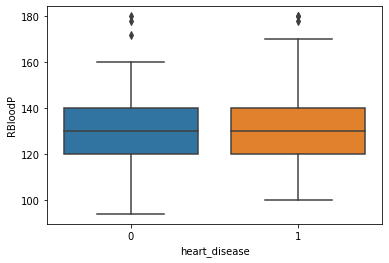

In [18]:
sns.boxplot(x=y['heart_disease'],y=X['RBloodP'])

(array([ 1.,  3.,  2., 16., 10.,  5., 27., 17., 29.,  8., 25.,  7.,  0.,
        12.,  2.,  9.,  0.,  1.,  1.,  5.]),
 array([ 94. ,  98.3, 102.6, 106.9, 111.2, 115.5, 119.8, 124.1, 128.4,
        132.7, 137. , 141.3, 145.6, 149.9, 154.2, 158.5, 162.8, 167.1,
        171.4, 175.7, 180. ]),
 <a list of 20 Patch objects>)

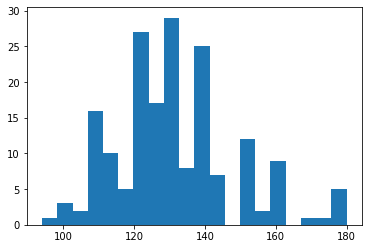

In [19]:
plt.hist(X['RBloodP'],bins=20)

Text(0, 0.5, 'Frequency (blood Pressure)')

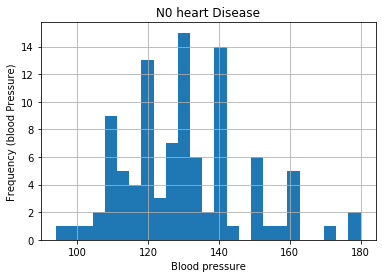

In [20]:
#blood pressure of a person who has no heart disease
index_H0=y['heart_disease']==0
index=X[index_H0].index
#blood pressure who don't have heart disease
blood_pH0=X.iloc[index,[3]]
blood_pH0.hist(bins=25)
blood_pH0.columns=['Blood Pressure (NO Heart disease)']
plt.title("N0 heart Disease")
plt.xlabel("Blood pressure")
plt.ylabel("Frequency (blood Pressure)")

Text(0, 0.5, 'Frequency (blood Pressure)')

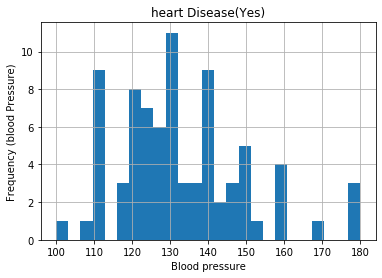

In [21]:
#blood pressure of a person who has a sign of Heart disease
index_H1=y['heart_disease']==1
index=X[index_H1].index
#blood pressure who have heart disease
blood_pH1=X.iloc[index,[3]]
blood_pH1.hist(bins=25)
blood_pH1.columns=['Blood Pressure (Heart disease)']
plt.title("heart Disease(Yes)")
plt.xlabel("Blood pressure")
plt.ylabel("Frequency (blood Pressure)")

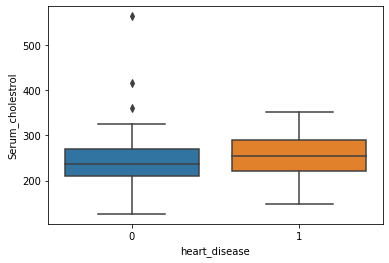

In [22]:
sns.boxplot(x=y['heart_disease'],y=X['Serum_cholestrol'])

Text(0, 0.5, 'Frequency (Serum Chlorestrol)')

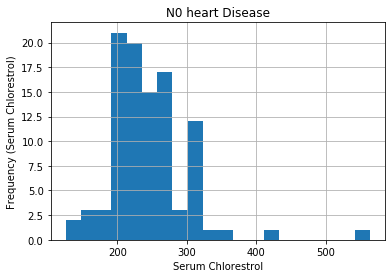

In [23]:
index_H0=y['heart_disease']==0
index=X[index_H0].index
#blood pressure who don't have heart disease
Serum_chlo_H0=X.iloc[index,[8]]
Serum_chlo_H0.hist(bins=20)
Serum_chlo_H0.columns=['Serum Chlorestrol (NO Heart disease)']
plt.title("N0 heart Disease")
plt.xlabel("Serum Chlorestrol")
plt.ylabel("Frequency (Serum Chlorestrol)")

Text(0, 0.5, 'Frequency (Serum Chlorestrol)')

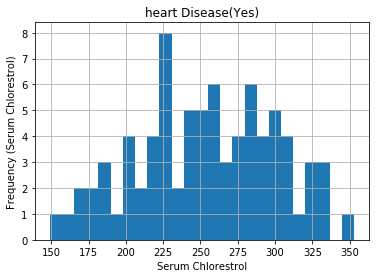

In [24]:
index_H1=y['heart_disease']==1
index=X[index_H1].index
#blood pressure who have heart disease
Serum_chlo_H1=X.iloc[index,[8]]
Serum_chlo_H1.hist(bins=25)
Serum_chlo_H1.columns=['Serum Chlorestrol ( Heart disease)']
plt.title("heart Disease(Yes)")
plt.xlabel("Serum Chlorestrol")
plt.ylabel("Frequency (Serum Chlorestrol)")

In [25]:
#sampling distribution of a sample mean
def plotsampledist(df):  
    import random
    sc=df.iloc[:,0].values.tolist()    
    data=[]
    for i in np.arange(100000):
        a=random.sample(sc,60)
        sum1=sum(a)
        a=sum1/60
        data.append(a)

    plt.hist(data,bins=27)
    plt.xlabel(df.columns[0])
    plt.title("sampling distribution of a sample mean")

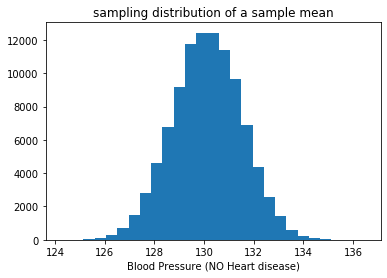

In [26]:
plotsampledist(blood_pH0)
# having  a mean value is about 130

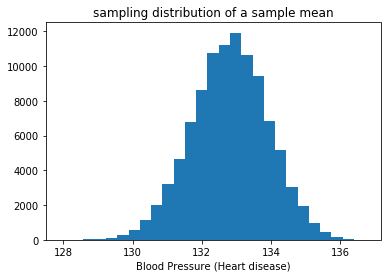

In [27]:
plotsampledist(blood_pH1)
# mean value is about 132.5

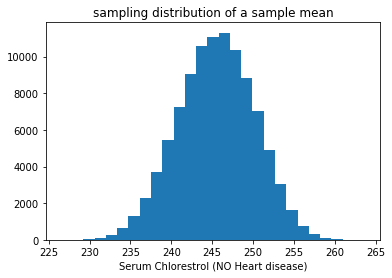

In [28]:
plotsampledist(Serum_chlo_H0)
#mean value is about 245

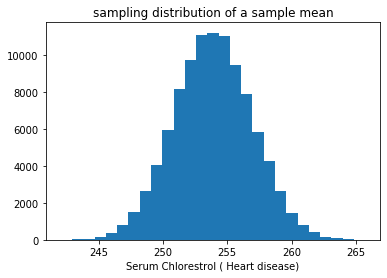

In [29]:
plotsampledist(Serum_chlo_H1)
#mean value is about 253